In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

Results: 78.21% (metric: accuracy)

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline 

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I think the problem of trying to predict whether or not a client will default on their credit card bill is a useful and interesting thing to try and predict.  Many of the features look like they could be strongly correlated with the target.  Some features, like limit_bal and all of the repayment status features, look like they could be highly correlated with each other or other input variables.  Additionally, having 6 features each for amount on bill statement, amount of previous payment, and repayment status seems unnecesssary and redundant, those features could probably be combined.  

In [3]:
# reading in dataset as csv
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
# split into X and y
X = credit_df.drop(columns = ["default.payment.next.month"])
y = credit_df["default.payment.next.month"]

# splitting into training and testing 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [5]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no null values in the dataset.

In [7]:
print(f'Mean of training set target variable: {sum(y_train)/len(y_train)}')

Mean of training set target variable: 0.22323809523809524


Approximately 22% of customers in the training set defaulted on their debt.

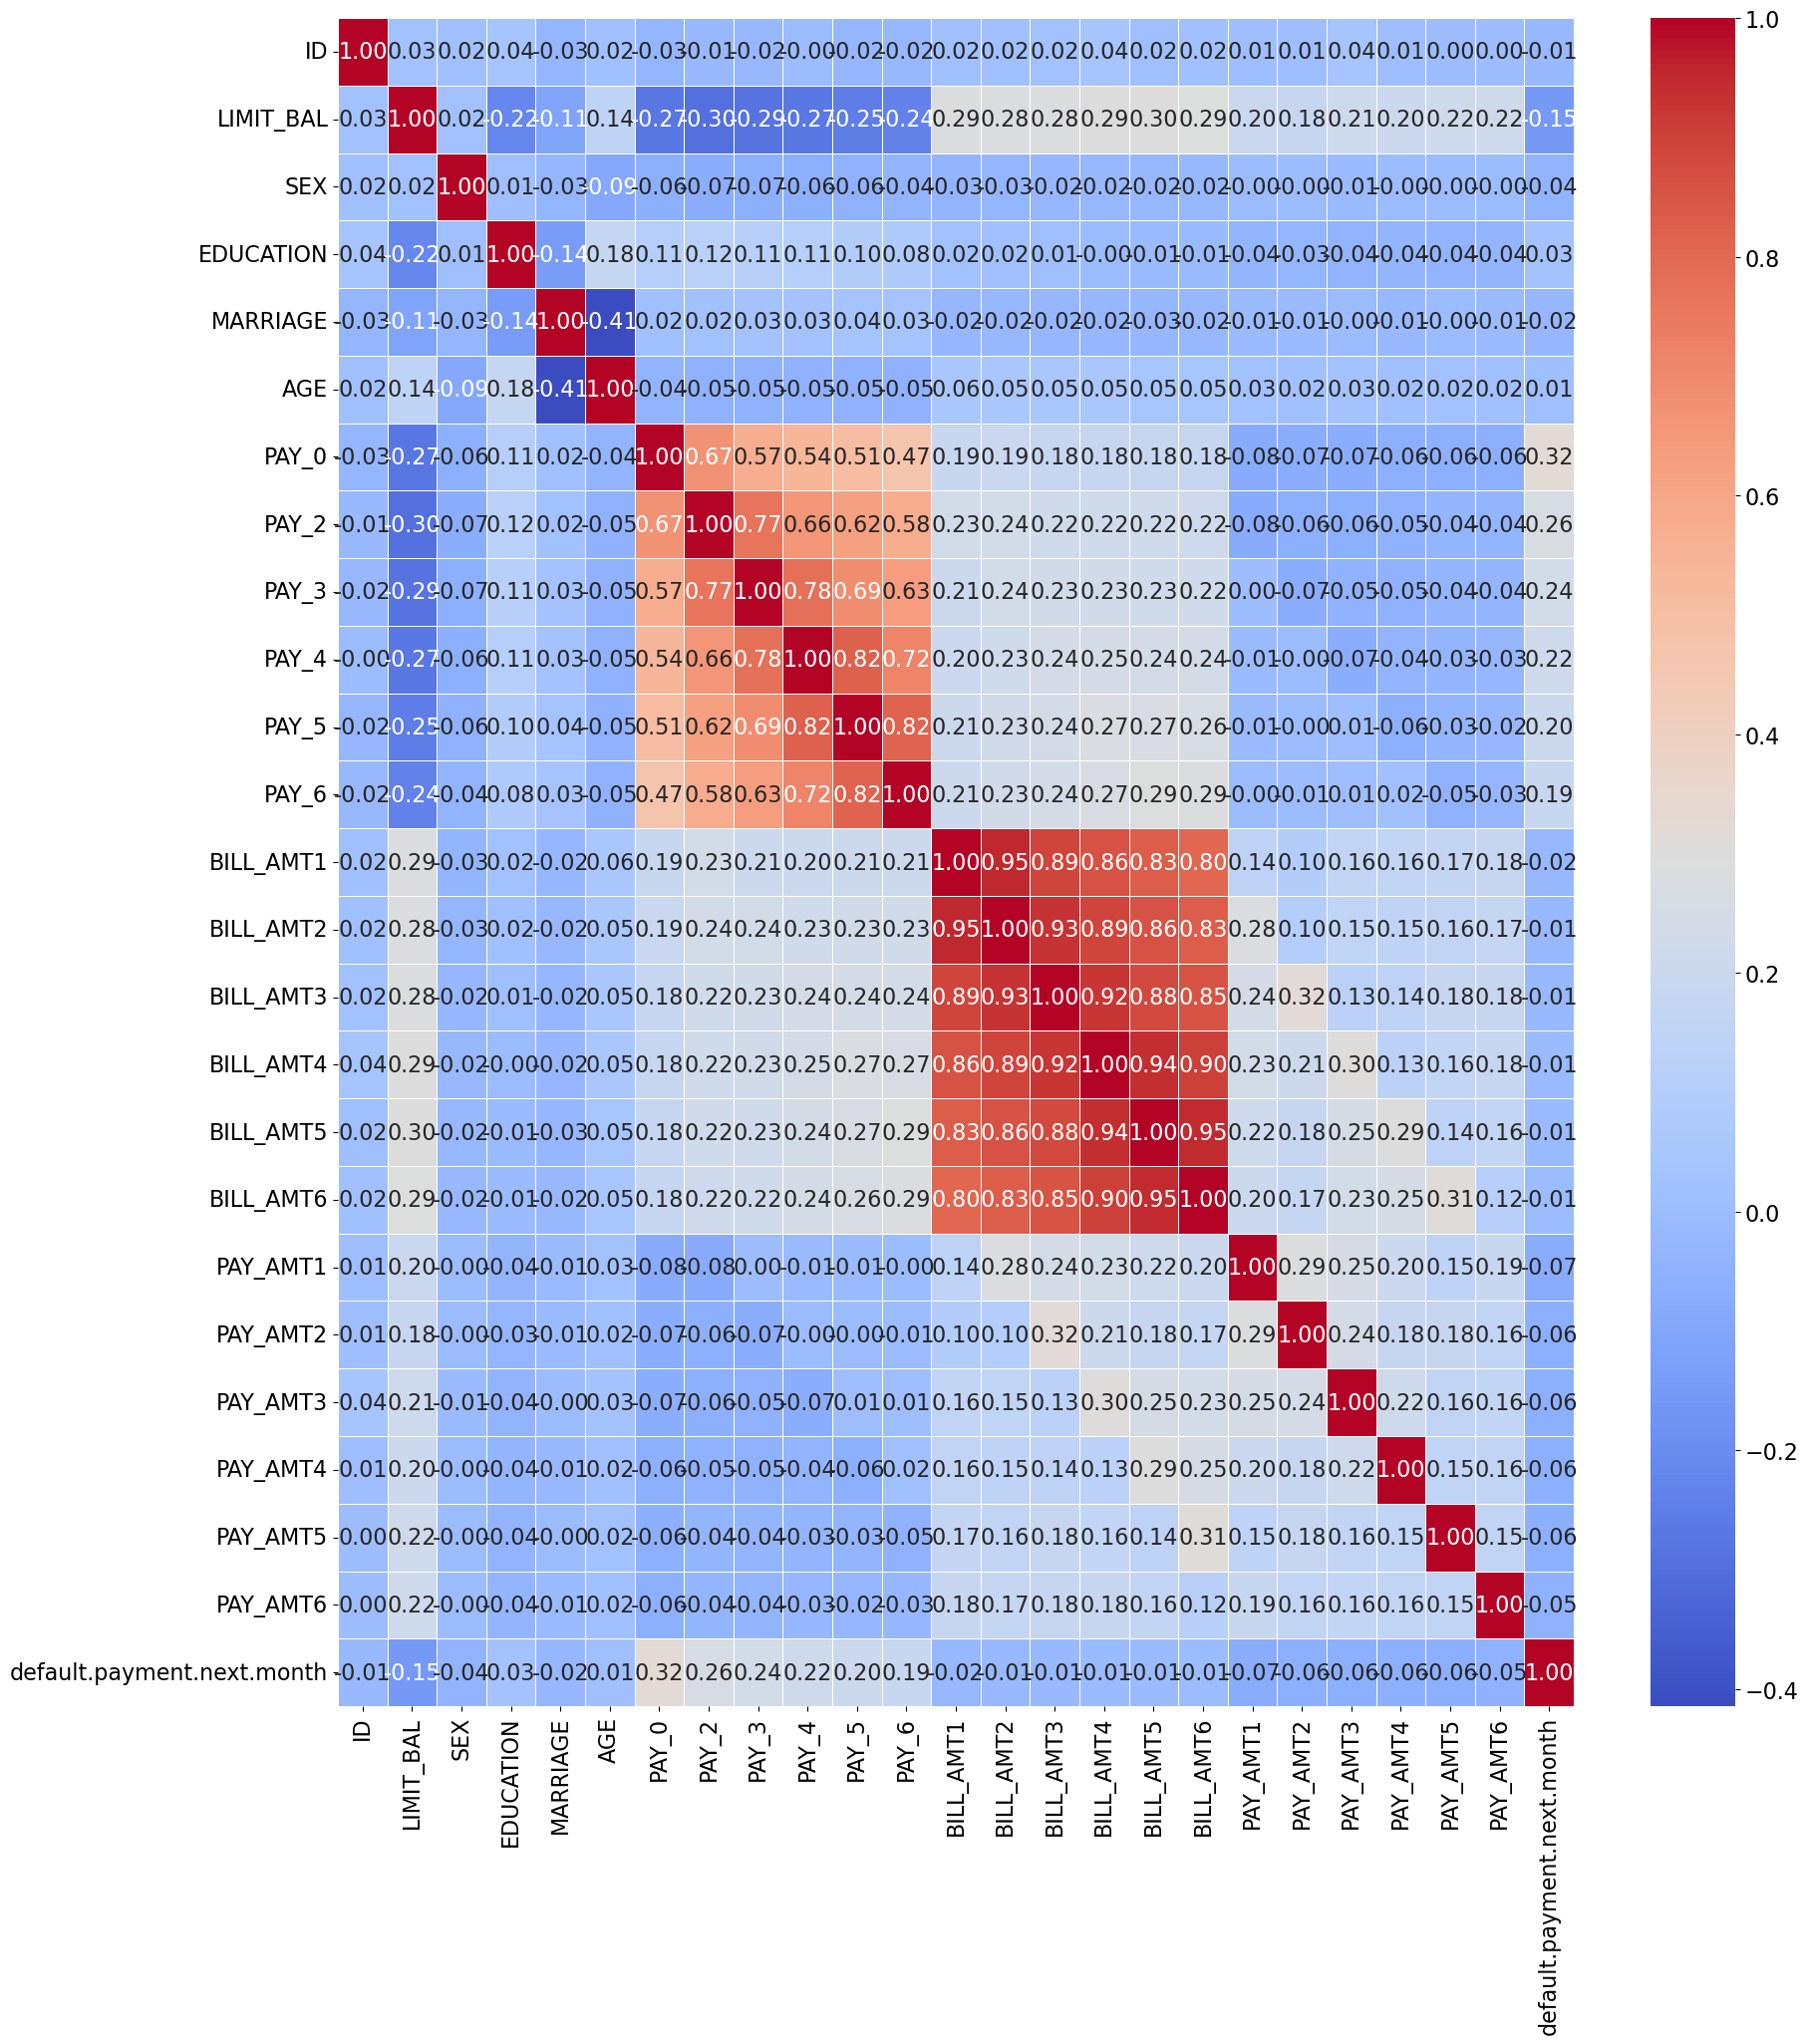

In [8]:
corr_matrix = credit_df.corr()
plt.figure(figsize=(20,22))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5);

As we can see from the correlation heatmap, all of the bill_amt input variables are highly correlated and all of the pay variables are highly correlated with each other.  

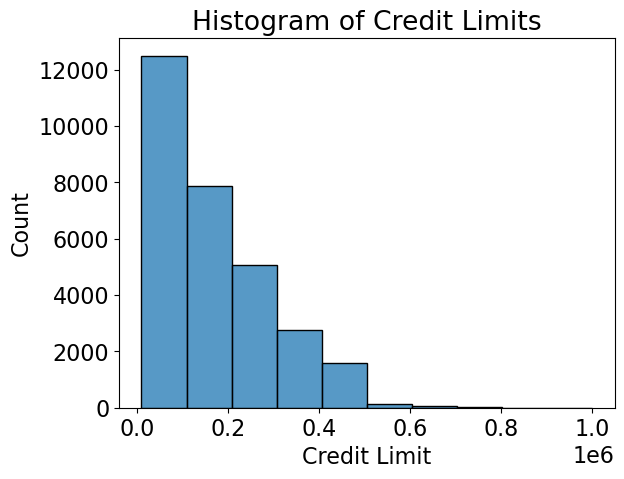

In [9]:
sns.histplot(credit_df['LIMIT_BAL'], bins=10)
plt.title("Histogram of Credit Limits")
plt.xlabel("Credit Limit")
plt.ylabel("Count");

This histogram shows us that the majority of people have a credit limit under 100,000 dollars, while only a select few people have a credit limit over $500,000.   

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

Since we have 6 months of Bill and Payment data we want to find the averages for these two metrics for each customer to get an overall understanding of their consumer behaviour. By obtaining a customers average bill amount we can better understand their expenses overtime as opposed to focusing in on specific months where an unexpectedly large expenditure may drastically increase their balance and therefore potentially increase their risk of default. Additionally, by obtaining a customers average payment amount we can understand how consistently they are paying their balance off. At this point we are not doing anything to Sex, Education, Marriage or Age. 

In [10]:
#Taking the mean of the 6 months of bill data
bill_data = [f"BILL_AMT{i}" for i in range(1,7)]
credit_df["avg_bill_amount"] = credit_df[bill_data].mean(axis = 1)

#Taking the mean of the 6 months of payment data
pay_data = [f"PAY_AMT{i}" for i in range(1,7)]
credit_df["avg_pay_amount"] = credit_df[pay_data].mean(axis = 1)

# credit_df

A popular metric utilized by credit unions to assess someones credit health is credit score. Calculating credit score involves carefully weighing several metrics about a consumers credit use. For this investigation we will create two new features using the data we have that credit unions commonly factor into someones credit score. 

1. The first factor will be the utilization ratio which measures how much credit an individual uses per month out of their overall credit limit. We've usually been told its good to keep that utilization ratio below 30-35% to optimize your credit score, so lets see what these consumers are doing and if it can be used to predict defaults.

2. The second factor will be how much of the total balance the individual actually pays off. If you have a credit card balance it is in ones best interest to pay it off in whole before the due date as to avoid additional interest payments. Credit unions factor this into their credit score as someone who cannot pay in full is now at higher risk of defaulting because they must now pay off their remaining balance and the added interest on top of it.

For both of these features we will use the averages we calculated from the cell above

In [11]:
credit_df["util_ratio"] = credit_df["avg_bill_amount"]/credit_df["LIMIT_BAL"]
credit_df["paid_balance_ratio"] = credit_df["avg_pay_amount"] / (credit_df["avg_bill_amount"] + 1e-5)

#NOTE TO SELF: Had to add 1e-5 to the paid balance ratio because it resulted in infinate values due to division by 0. This
#eventually messed up building the pipeline, so i backtracked to this.
# credit_df

We also want to consider each consumers prior credit payment history by looking at how many months behind on payments they have been. Since there are 6 months worth of data we are going to create a column that contains the maximum number of months an individual was behind on payments. By doing this our model will be able to factor in if an individual had previously been far behind on payments and therefore use this to predict whether they are more likely to default or not. 

In [12]:
credit_df["max_pay_delay"] = credit_df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].max(axis = 1)

credit_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,avg_bill_amount,avg_pay_amount,util_ratio,paid_balance_ratio,max_pay_delay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,1284.000000,114.833333,0.064200,0.089434,2
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,2846.166667,833.333333,0.023718,0.292791,2
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,16942.166667,1836.333333,0.188246,0.108388,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,38555.666667,1398.000000,0.771113,0.036259,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0,18223.166667,9841.500000,0.364463,0.540054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,5003.0,3047.0,5000.0,1000.0,0,120891.500000,7091.666667,0.549507,0.058661,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8998.0,129.0,0.0,0.0,0,3530.333333,2415.000000,0.023536,0.684071,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,22000.0,4200.0,2000.0,3100.0,1,11749.333333,5216.666667,0.391644,0.443997,4
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,1178.0,1926.0,52964.0,1804.0,1,44435.166667,24530.166667,0.555440,0.552044,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

We have 3 categorical variables (Sex, Education and Marriage) that we need to map so that it is easier to interpret after we transform them. 

In [13]:
credit_df["SEX"] = credit_df["SEX"].astype(int)
credit_df["EDUCATION"] = credit_df["EDUCATION"].astype(int)
credit_df["MARRIAGE"] = credit_df["MARRIAGE"].astype(int)

credit_df["SEX"] = credit_df["SEX"].map({1: "male", 
                                         2: "female"})

credit_df["EDUCATION"] = credit_df["EDUCATION"].map({1: "grad_school", 
                                                     2: "university",
                                                     3: "high_school", 
                                                     4: "other",
                                                     5: "unknown",
                                                     6: "unknown"})

credit_df["MARRIAGE"] = credit_df["MARRIAGE"].map({1: "married",
                                                   2: "single",
                                                   3: "other"})

credit_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,avg_bill_amount,avg_pay_amount,util_ratio,paid_balance_ratio,max_pay_delay
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,1284.000000,114.833333,0.064200,0.089434,2
1,2,120000.0,female,university,single,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,2846.166667,833.333333,0.023718,0.292791,2
2,3,90000.0,female,university,single,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,16942.166667,1836.333333,0.188246,0.108388,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,38555.666667,1398.000000,0.771113,0.036259,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0,18223.166667,9841.500000,0.364463,0.540054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high_school,married,39,0,0,0,0,...,5003.0,3047.0,5000.0,1000.0,0,120891.500000,7091.666667,0.549507,0.058661,0
29996,29997,150000.0,male,high_school,single,43,-1,-1,-1,-1,...,8998.0,129.0,0.0,0.0,0,3530.333333,2415.000000,0.023536,0.684071,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,22000.0,4200.0,2000.0,3100.0,1,11749.333333,5216.666667,0.391644,0.443997,4
29998,29999,80000.0,male,high_school,married,41,1,-1,0,0,...,1178.0,1926.0,52964.0,1804.0,1,44435.166667,24530.166667,0.555440,0.552044,1


We will now create two seperate lists, one with our numerical features (LIMIT_BAL, AGE, average bill amount, average payment amount, utilization ratio, paid balance ratio and the maximum monthly delay) and the other with our categorical features (Sex, Education and Marriage). 

In [14]:
numerical_feats = ["LIMIT_BAL", "AGE", "avg_bill_amount", "avg_pay_amount", "util_ratio", "paid_balance_ratio", "max_pay_delay"]
categorical_feats = ["SEX", "EDUCATION", "MARRIAGE"]

In [15]:
#Creating a Column Transformer
preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numerical_feats),
        ("cat", OneHotEncoder(drop = "first"), categorical_feats)
    ]
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

We will use a DummyClassifier as our baseline model. We will create a pipeline using our preprocessed data to ensure so that when we compare with other models the data we used was consistent amongst all. 

In [16]:
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("dummy", DummyClassifier(strategy = "most_frequent", random_state = 123))
])

# split into X and y
X = credit_df.drop(columns = ["default.payment.next.month"])
y = credit_df["default.payment.next.month"]

# splitting into training and testing 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'avg_bill_amount',
                                                   'avg_pay_amount',
                                                   'util_ratio',
                                                   'paid_balance_ratio',
                                                   'max_pay_delay']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('dummy',
                 DummyClassifier(random_state=123, strategy='most_frequent'))])

We will report performance via cross-validation as we want to save our test set for our more robust models. 

In [17]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv = 5, scoring = "accuracy") 
cv_scores

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

As we can see accuracy across folds is very consistent. We are getting an average of 0.776 which tells us that 77.6% of consumers belong to the majority class. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We will use a logistic regression for our linear model as it is utilized to predict binary variables. The primary hyperparameter we need to tune for this model is the Complexity parameter denoted by C. Using a C value that is too small can lead to underfitting whereas using a C value that is too large can lead to overfitting, hence it is important we find the ideal value for our model.

In [18]:
#Creating a pipeline using our preprocessed data
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter = 1000, random_state = 123))
])

#Listing out the different values for our complexity parameter C
param_grid = {
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100]
} 

#We will find the best value of C using the GridSearch method which we can call fit,
#predict or score on. In this case we will fit our model on GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_train, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'avg_bill_amount',
                                                                          'avg_pay_amount',
                                                                          'util_ratio',
                                                                          'paid_balance_ratio',
                                                                          'max_pay_delay']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=123))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [19]:
train_accuracy = grid_search.score(X_train, y_train)
print(f"Training accuracy for Logisitic Regression: {round(train_accuracy, 4)}")
print("Best C Parameter Value:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Training accuracy for Logisitic Regression: 0.7881
Best C Parameter Value: {'classifier__C': 1}
Best CV Accuracy: 0.788


As we can see the best value for the complexity parameter C is 1 and its associated CV accuracy obtained was 78.8% which is ~2% higher than our baseline DummyClassifier model. 

In [20]:
print("Best Standard Deviation:", grid_search.cv_results_["std_test_score"].mean())

Best Standard Deviation: 0.0011063750557650616


For the best complexity parameter C the standard deviation of CV scores across folds is 0.1% showing that there is good consistency across folds. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

### Tree-based Ensemble Model

Fit time for Decision Tree with depth 3: 0.0635
Training accuracy for Decision Tree with depth 3: 0.7874
Score time for Decision Tree with depth 3: 0.0164
Mean CV accuracy for Decision Tree with depth 3: 0.787


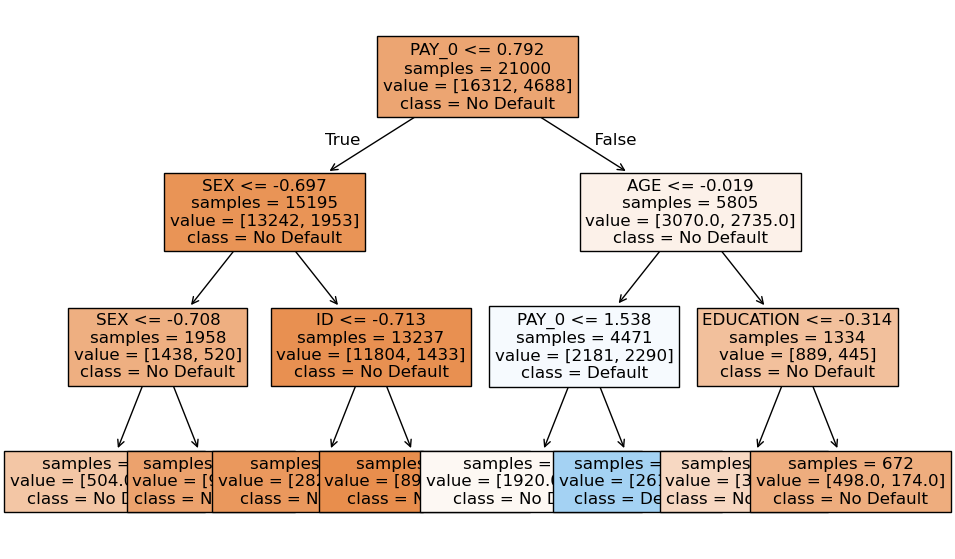

In [21]:
# depth = 3
# tree = DecisionTreeClassifier(max_depth=depth, random_state=123)
# start_fit = time.time()
# tree.fit(X_train, y_train)
# end_fit = time.time()
# fit_time = end_fit - start_fit
# print(f"Fit time for Decision Tree with depth {depth}: {round(fit_time, 4)}")

# start_score = time.time()
# train_accuracy = tree.score(X_train, y_train)
# end_score = time.time()
# score_time = end_score - start_score
# print(f"Training accuracy for Decision Tree with depth {depth}: {round(train_accuracy, 2)}")
# print(f"Score time for Decision Tree with depth {depth}: {round(score_time, 4)}")

# cv_scores = cross_val_score(tree, X_train, y_train, cv=5)
# print(f"Mean CV accuracy for Decision Tree with depth {depth}: {round(cv_scores.mean(), 2)}")

# plt.figure(figsize=(11, 7))
# plot_tree(
#   tree, filled=True, feature_names=X_train.columns, 
#   class_names=["No Default", "Default"], impurity=False, fontsize=12
# );

depth = 3
decision_tree_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth = depth, random_state = 123))
])

start_fit = time.time()
decision_tree_pipeline.fit(X_train, y_train)
end_fit = time.time()
fit_time = end_fit - start_fit
print(f"Fit time for Decision Tree with depth {depth}: {round(fit_time, 4)}")

start_score = time.time()
train_accuracy = decision_tree_pipeline.score(X_train, y_train)
end_score = time.time()
score_time = end_score - start_score
print(f"Training accuracy for Decision Tree with depth {depth}: {round(train_accuracy, 4)}")
print(f"Score time for Decision Tree with depth {depth}: {round(score_time, 4)}")

cv_scores = cross_val_score(decision_tree_pipeline, X_train, y_train, cv=5)
print(f"Mean CV accuracy for Decision Tree with depth {depth}: {round(cv_scores.mean(), 4)}")

plt.figure(figsize=(11, 7))
plot_tree(
  decision_tree_pipeline.named_steps["classifier"], 
  filled=True, 
  feature_names=X_train.columns, 
  class_names=["No Default", "Default"], 
  impurity=False, 
  fontsize=12
);

#### Result: Achieves very similar mean CV accuracy compared to the Linear model with a very low fit time. This leaves us with some room to optimize hyperparameters like max depth which can potentially increase our model performance. Training accuracy and mean CV accuracy are nearly identical but very close to the baseline model suggesting we are underfitting since we are not performing much better than the baseline.

### K-Nearest Neighbours Model

In [22]:
# num_neighbors = 7
# knn = KNeighborsClassifier(n_neighbors=num_neighbors)
# start_fit = time.time()
# knn.fit(X_train, y_train)
# end_fit = time.time()
# print(f"Fit time for KNN with {num_neighbors} neighbors: {round(fit_time, 4)}")

# start_score = time.time()
# train_acc = knn.score(X_train, y_train)
# end_score = time.time()
# score_time = end_score - start_score
# print(f"Training accuracy for KNN with {num_neighbors} neighbors: {round(train_acc, 2)}")
# print(f"Score time for KNN with {num_neighbors} neighbors: {round(score_time, 4)}")

# cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
# print(f"Mean CV accuracy for KNN with {num_neighbors} neighbors: {round(cv_scores.mean(), 2)}")

num_neighbors = 7

knn_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors = num_neighbors))
])

start_fit = time.time()
knn_pipeline.fit(X_train, y_train)
end_fit = time.time()
print(f"Fit time for KNN with {num_neighbors} neighbors: {round(fit_time, 4)}")

start_score = time.time()
train_acc = knn_pipeline.score(X_train, y_train)
end_score = time.time()
score_time = end_score - start_score
print(f"Training accuracy for KNN with {num_neighbors} neighbors: {round(train_acc, 4)}")
print(f"Score time for KNN with {num_neighbors} neighbors: {round(score_time, 4)}")

cv_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5)
print(f"Mean CV accuracy for KNN with {num_neighbors} neighbors: {round(cv_scores.mean(), 4)}")

Fit time for KNN with 7 neighbors: 0.0635
Training accuracy for KNN with 7 neighbors: 0.8218
Score time for KNN with 7 neighbors: 0.6475
Mean CV accuracy for KNN with 7 neighbors: 0.7752


#### Result: Achieves a ~3% higher training accuracy than the Linear model but ~1% lower CV accuracy with a relatively low fit time. This leaves us with some room to optimize hyperparameters like n-nearest neighbors  which can potentially increase our model performance. Training accuracy and mean CV accuracy are relatively close but very close to the baseline model suggesting we are underfitting since we are not performing much better than the baseline. 

### SVM Model

In [23]:
# svm = SVC(kernel='linear', C=1) 
# start_fit = time.time()
# svm.fit(X_train, y_train)
# end_fit = time.time()
# print(f"Training accuracy for SVM: {round(train_acc, 2)}")

# start_score = time.time()
# train_acc = svm.score(X_train, y_train)
# print(f"Fit time for SVM: {round(fit_time, 4)}")
# end_score = time.time()
# score_time = end_score - start_score
# print(f"Score time for SVM: {round(score_time, 4)}")

# cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
# print(f"Mean CV accuracy for SVM: {round(cv_scores.mean(), 2)}")


svm_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel = "linear", C = 1, random_state = 123))
])

start_fit = time.time()
svm_pipeline.fit(X_train, y_train)
end_fit = time.time()
print(f"Training accuracy for SVM: {round(train_acc, 4)}")

start_score = time.time()
train_acc = svm_pipeline.score(X_train, y_train)
print(f"Fit time for SVM: {round(fit_time, 4)}")
end_score = time.time()
score_time = end_score - start_score
print(f"Score time for SVM: {round(score_time, 4)}")

cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=5)
print(f"Mean CV accuracy for SVM: {round(cv_scores.mean(), 4)}")

Training accuracy for SVM: 0.8218
Fit time for SVM: 0.0635
Score time for SVM: 5.0682
Mean CV accuracy for SVM: 0.7768


#### Result: Achives a ~3% higher training accuracy than the Linear model but ~1% lower CV accuracy with a relatively low fit time but higher score time. Training accuracy and mean CV accuracy are relatively close but very close to the baseline model suggesting we are underfitting since we are not performing much better than the baseline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

We will try implementing SelectFromModel feature selection in our SVM model pipeline and compare the training accuracy and mean CV score of this version to our old one. 

In [24]:
from sklearn.feature_selection import SelectFromModel
svm_pipeline_feat_selec = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("feature_selection", SelectFromModel(SVC(kernel = "linear", C = 1, random_state = 123), threshold = "median")),
    ("classifier", SVC(kernel = "linear", C = 1, random_state = 123))
])

start_fit = time.time()
svm_pipeline_feat_selec.fit(X_train, y_train)
end_fit = time.time()
print(f"Training accuracy for SVM with feature selection: {round(train_acc, 4)}")

start_score = time.time()
train_acc = svm_pipeline_feat_selec.score(X_train, y_train)
print(f"Fit time for SVM with feature selection: {round(fit_time, 4)}")
end_score = time.time()
score_time = end_score - start_score
print(f"Score time for SVM with feature selection: {round(score_time, 4)}")

cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=5)
print(f"Mean CV accuracy for SVM with feature selection: {round(cv_scores.mean(), 4)}")

Training accuracy for SVM with feature selection: 0.7768
Fit time for SVM with feature selection: 0.0635
Score time for SVM with feature selection: 4.2872
Mean CV accuracy for SVM with feature selection: 0.7768


In this instance there was no benefit of using feature selection as our training accuracy and mean CV score matches that of the baseline model and is lower than our model with no feature selection. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

### Decision Tree Hyperparameter Optimization

In [25]:
#Building pipeline
decision_tree_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state = 123))
])

#Setting up hyperparameter options via parameter grid
param_grid = {"classifier__criterion": ["gini", "entropy"],
              "classifier__max_depth": np.arange(1, 20, 2)
             }

#Grid Search to find the best hyperparameters 
grid_search_dt = GridSearchCV(decision_tree_pipeline, 
                              param_grid = param_grid, 
                              scoring = "accuracy",
                              cv = 5,
                              return_train_score = True
                             )

grid_search_dt.fit(X_train, y_train) 

train_accuracy = grid_search_dt.score(X_train, y_train)
print(f"Training accuracy for Decision tree with optimized hyperparameters: {round(train_accuracy, 4)}")
print("Best hyperarameter values:", grid_search_dt.best_params_)
print("Best Mean CV Accuracy:", grid_search_dt.best_score_)

Training accuracy for Decision tree with optimized hyperparameters: 0.792
Best hyperarameter values: {'classifier__criterion': 'gini', 'classifier__max_depth': 5}
Best Mean CV Accuracy: 0.7871904761904761


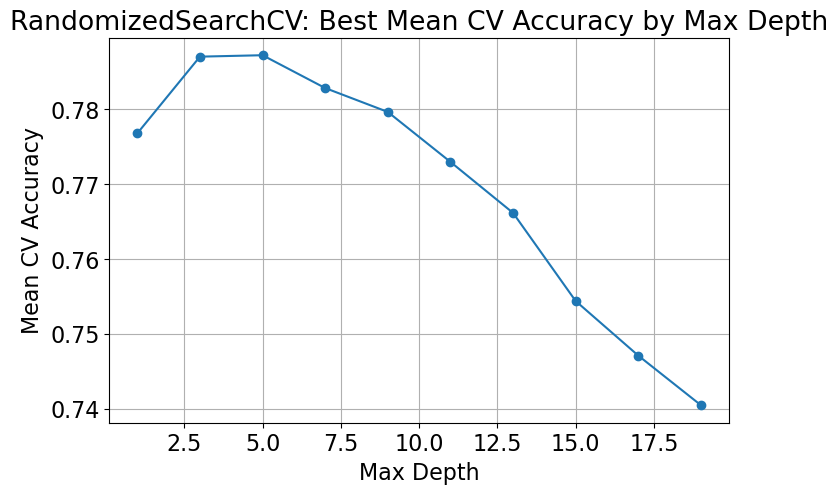

Training accuracy for Decision tree with optimized hyperparameters: 0.792
Best hyperarameter values: {'classifier__max_depth': 5, 'classifier__criterion': 'gini'}
Best Mean CV Accuracy: 0.7871904761904761


In [56]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#Building pipeline
decision_tree_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state = 123))
])

#Setting up hyperparameter options via parameter grid
param_dist = {"classifier__criterion": ["gini", "entropy"],
              "classifier__max_depth": np.arange(1, 20, 2)
             }

#Grid Search to find the best hyperparameters 
randomized_search_dt = RandomizedSearchCV(decision_tree_pipeline, 
                              param_distributions = param_dist, 
                              scoring = "accuracy",
                              cv = 5,
                              return_train_score = True,
                              n_iter = 20
                             )

randomized_search_dt.fit(X_train, y_train) 

#Converting the randomized search results into pandas df
results_df = pd.DataFrame(randomized_search_dt.cv_results_)

# Group by max_depth and find the maximum mean_test_score for each depth
grouped = results_df.groupby("param_classifier__max_depth")["mean_test_score"].max()

# Plot the results
plt.figure(figsize=(8, 5))
grouped.plot(kind="line", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")
plt.title("RandomizedSearchCV: Best Mean CV Accuracy by Max Depth")
plt.grid(True)
plt.show()

train_accuracy = randomized_search_dt.score(X_train, y_train)
print(f"Training accuracy for Decision tree with optimized hyperparameters: {round(train_accuracy, 4)}")
print("Best hyperarameter values:", randomized_search_dt.best_params_)
print("Best Mean CV Accuracy:", randomized_search_dt.best_score_)

We tried to optimize the classifier criterion and max depth of the Decision Tree using GridSearch and RandomizedSearch to find the optimal values that give the highest mean CV accuracy. This was relatively unsuccessful as the mean CV accuracy is the same as when we used no optimal hyperparameters suggesting the model is not complex enough in its current state. 

### K-Nearest Neighbors Hyperparameter Optimization

In [27]:
#Building pipeline
knn_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

#Setting up hyperparameter options via parameter grid
param_grid = {"classifier__n_neighbors": list(range(1,50))}

#Grid Search to find the best hyperparameters 
grid_search_knn = GridSearchCV(knn_pipeline, 
                              param_grid = param_grid, 
                              scoring = "accuracy",
                              cv = 5,
                             )

grid_search_knn.fit(X_train, y_train) 

train_accuracy = grid_search_knn.score(X_train, y_train)
print(f"Training accuracy for KNN Classifier with optimized hyperparameters: {round(train_accuracy, 4)}")
print("Best hyperarameter values:", grid_search_knn.best_params_)
print("Best Mean CV Accuracy:", grid_search_knn.best_score_)

Training accuracy for KNN Classifier with optimized hyperparameters: 0.8051
Best hyperarameter values: {'classifier__n_neighbors': 17}
Best Mean CV Accuracy: 0.7839523809523811


Tuning the number of neighbors hyperparameter resulted in a small 0.6% increase in mean CV accuracy and ~2% decrease in training accuracy. This suggests the model is doing a better job generalizing but it is still performing close to the baseline model which isnt what we hoped for.

### SVM Hyperparameter Optimization

In [28]:
#Building pipeline
svm_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", SVC(random_state = 123))
])

#Setting up hyperparameter options via parameter grid
param_grid = {"classifier__C": [0.1, 1, 10, 100]}

#Grid Search to find the best hyperparameters 
grid_search_svm = GridSearchCV(svm_pipeline, 
                              param_grid = param_grid, 
                              scoring = "accuracy",
                              cv = 5
                             )

# grid_search_svm.fit(X_train, y_train) 

# train_accuracy = grid_search_svm.score(X_train, y_train)
# print(f"Training accuracy for SVM with optimized hyperparameters: {round(train_accuracy, 4)}")
# print("Best hyperarameter values:", grid_search_svm.best_params_)
# print("Best Mean CV Accuracy:", grid_search_svm.best_score_)

Cell wont run 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

### Feature Importance for Decision Tree Classifier

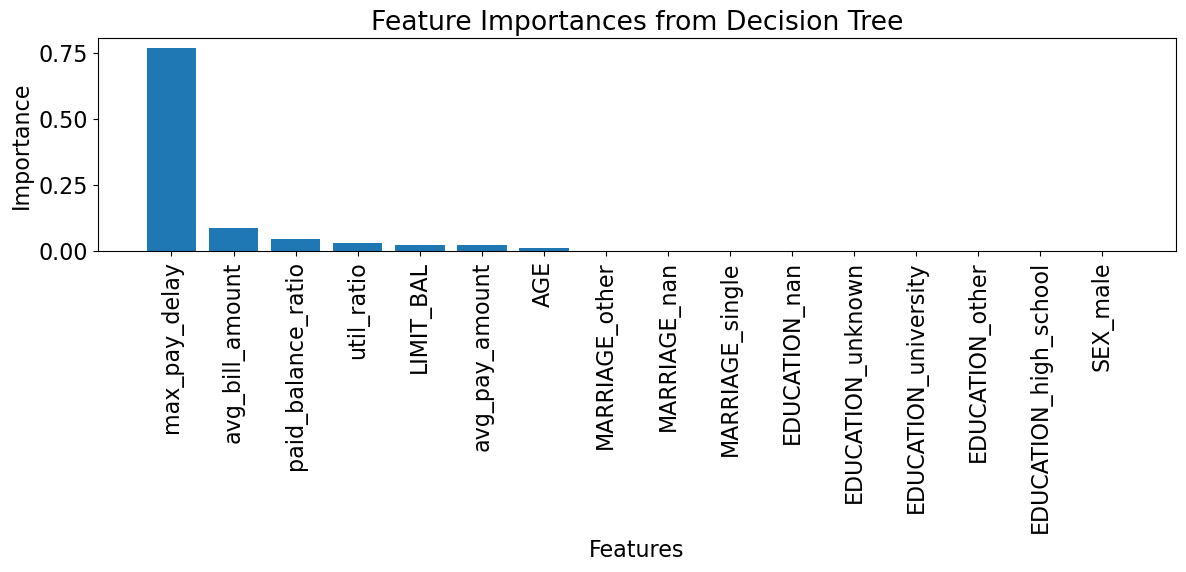

In [59]:
#Refitting classifier
X_train_preprocessed = preprocessor.transform(X_train)

decision_tree_model_shap = DecisionTreeClassifier(max_depth = 5, random_state = 123)
decision_tree_model_shap.fit(X_train_preprocessed, y_train)

importances = decision_tree_model_shap.feature_importances_

#Sorting the features by importance using their indices
indices = np.argsort(importances)[::-1]

#Plot of feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Decision Tree")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

By extracting feature importances it is obvious that max_pay_delay has a very strong influence on decision tree splits, indicating that within this model maximum payment delay history is the strongest predictor of consumer default. Average monthly bill amount and the average amount of balance paid off also play a role in prediciton but are far less influential than the maximum payment delay. Utilization ratio, credit limit, average payment amount and age have even less impact but still are used marginally in prediction. Most of the categorical variables like marrriage and education and sex have no impact which is a good thing societally speaking. Overall, the model relies heavily on the maximimum payment delay to make predicitions with other financial factors only being utilised marginally and categorical variables having no influence. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

### Trying KNN Model on Test Data 

In [60]:
best_knn_pipeline = grid_search_knn.best_estimator_
print("Best KNN Pipeline:", best_knn_pipeline)

Best KNN Pipeline: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'avg_bill_amount',
                                                   'avg_pay_amount',
                                                   'util_ratio',
                                                   'paid_balance_ratio',
                                                   'max_pay_delay']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=17))])


In [63]:
test_accuracy = best_knn_pipeline.score(X_test, y_test)
print(f"Test set accuracy for KNN: {test_accuracy:.4f}")

Test set accuracy for KNN: 0.7821


The testing accuracy of 78.21% is very close to the cross-validation accuracy of 78.40% which tells us that the model does a good job in generalizing when given unseen data. The difference between testing accuracy and training accuracy is also slim which is good as it suggests the model barely overfits on the data. The issue we have with these results is that this tuned model only performs ~0.8% better than the baseline model we created in Part 6. Thus, given more time we would likely go back and explore more robust feature engineering methods, try different model types and engage in more extensive hyperparameter tuning to try and perform better compared to our baseline model. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

### Table with important results 

| Model                      | Best Hyperparameters                                | Training Accuracy | Mean CV Accuracy | Test Set Accuracy |
|----------------------------|-----------------------------------------------------|-------------------|------------------|-------------------|
| Baseline                   | N/A                                                 | 0.777             | 0.777            | 0.777             |
| Decision Tree              | Max Depth: 5, Criterion: gini | 0.792            | 0.78719          | NA      |
| SVM  | N/A                                                 | 0.7768            | 0.7768           | NA      |
| **Tuned KNN**              | **Number of neighbors: 17**                     | **0.8051**           | **0.78395**          | **0.7821**         |

**NOTE**: Markdown text for creating the table was generated by chatgpt to reduce redundancy in creating table borders and lining everything up. Prompt asked "Make a markdown table with columns Model, Best Hyperparameters, Training Accuracy, Mean CV Accuracy and Test Set Accuracy. The models are Baseline, Decision Tree, SVM and Tuned KNN" I then provided the data for each of the columns from the outputs of the models code cells above.

### Concluding Remarks and Future Considerations 

The final tuned KNN model achieved an accuracy of 78.21% when scored on the testing set which is only 0.8% higher than our baseline model. The Decision Tree and SVM models had similar results when we look at their cross-validation accuracy scores. Ultimately, the closeness of training, CV and test scores suggests our model generalizes well while the similarity to the baseline model suggests that their is room for improvement. There are a few different methods by which we could try to improve our models performance. 

1. We could enhance our feature engineering methods by either implementing new features used in the credit industry or by eliminating ones we have already made. We saw that the maximum number of months and individual was delayed on payments was a huge factor in our DecisionTree model in part 11. How we chose to engineer this factor couldve led it to be overrepresented in the model and therefore we could adjust it so that it such that other factors get more representation within the model. The same could be said about underrepresented factors like utilization ratio which could potentially be better represented. In this instance we used a ratio, but we could also use a difference to quantify the value differently.

2. We could use ensemble methods that we have learned recently in the course to combine our current models and potentially increase their performance.

3. We could test out different methods of hyperparameter optimization. For instance, we relied on Grid and Randomized search in this investigation but we couldve also tried Bayesian methods like scikit-optimize. We chose not to out of the interest of time, but given a larger scale investigation multiple tuning techniques couldve been used on each model to pinpoint the best hyperparameters.



In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)